In [45]:
import pandas as pd
import glob, os, re
import matplotlib.pyplot as plt
from pathlib import Path
import mplcursors

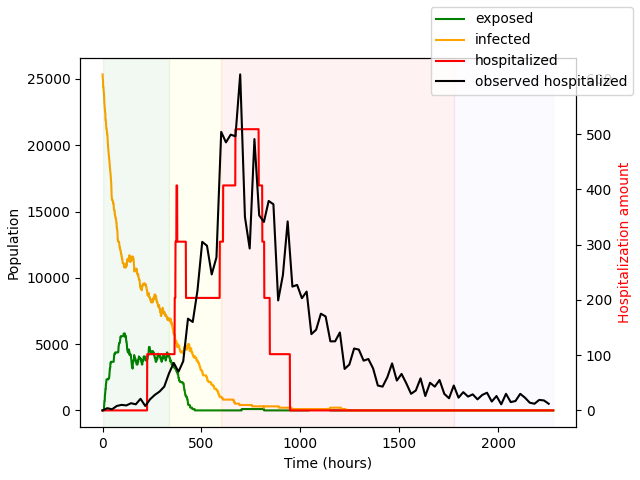

In [56]:
%matplotlib widget
infected = pd.read_csv("~/cbs-covid/build/output/csv_files/infectious.csv")
exposed = pd.read_csv("~/cbs-covid/build/output/csv_files/exposed.csv")
hospitalized = pd.read_csv("~/cbs-covid/build/output/csv_files/hospitalized.csv")
real_hospitalized = pd.read_csv("~/cbs-covid/src/data/observed_hospital_admissions_per_day.csv")

real_hospitalized.loc[-1] = [0]  # adding a row
real_hospitalized.index = real_hospitalized.index + 1  # shifting index
real_hospitalized.sort_index(inplace=True) 
real_hospitalized.drop(real_hospitalized.tail(1).index,inplace=True) # drop last n rows

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(exposed.y, label='exposed', color='g')
ax1.plot(infected.y, label='infected', color='orange')
ax2.plot(hospitalized.y, label='hospitalized', color='r')
days = [24*i for i in range(0, len(real_hospitalized))]
ax2.plot(days, real_hospitalized, label='observed hospitalized', color='k')

ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Population')
ax2.set_ylabel('Hospitalization amount', color='red')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper right')

mplcursors.cursor(hover=False)

# Color background
plt.axvspan(0, 336, color='green', alpha=0.05)
plt.axvspan(337, 336+264, color='yellow', alpha=0.05)
plt.axvspan(336+264+1, 336+264+1176, color='red', alpha=0.05)
plt.axvspan(336+264+1176+1, 336+264+1176+504, color='blue', alpha=0.02)

plt.show()


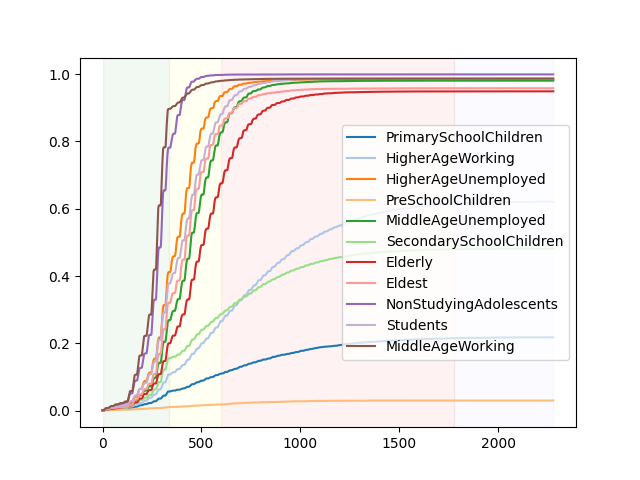

In [54]:
%matplotlib widget

colors = iter([plt.cm.tab20(i) for i in range(20)])
for file in glob.glob(str(Path.home())+"/cbs-covid/build/output/csv_files/affected_*"):
    df = pd.read_csv(file)
    linename = re.search('affected_(.*).csv', os.path.basename(file)).group(1)
    c = next(colors)
    plt.plot(df.x,df.y, c=c, label=linename)

# Color background
plt.axvspan(0, 336, color='green', alpha=0.05)
plt.axvspan(337, 336+264, color='yellow', alpha=0.05)
plt.axvspan(336+264+1, 336+264+1176, color='red', alpha=0.05)
plt.axvspan(336+264+1176+1, 336+264+1176+504, color='blue', alpha=0.02)

plt.legend()
plt.show()
ax = plt.gca()
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

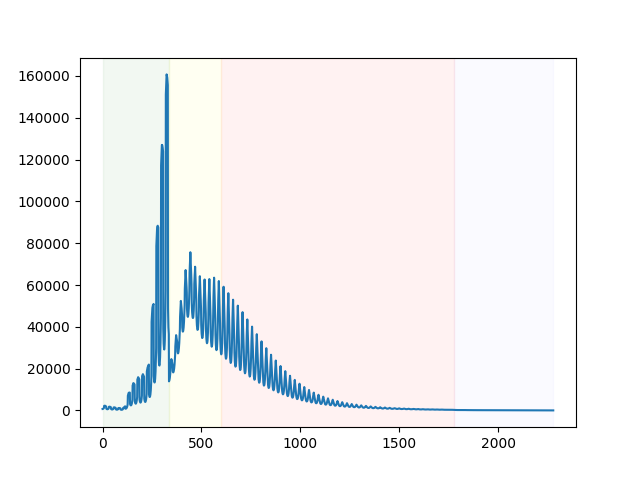

In [55]:
%matplotlib widget
mixsum = pd.read_csv("~/cbs-covid/build/output/csv_files/mixsum_totals.csv").y
# Color background
plt.axvspan(0, 336, color='green', alpha=0.05)
plt.axvspan(337, 336+264, color='yellow', alpha=0.05)
plt.axvspan(336+264+1, 336+264+1176, color='red', alpha=0.05)
plt.axvspan(336+264+1176+1, 336+264+1176+504, color='blue', alpha=0.02)

plt.plot(mixsum)

# The second small wave is there because of the continued increase of infections (lag) but at a smaller magntitude
# because the absolute number of interactions now limited by the working-from-home policy